![title](used_car_sale.jpg)

# Exploring Ebay Car Sales Data

Over 370000 used cars scraped with Scrapy from Ebay-Kleinanzeigen. The content of the data is in german, so one has to translate it first if one can not speak german. Those fields are included:
autos.csv:

- dateCrawled : when this ad was first crawled, all field-values are taken from this date
- name : "name" of the car
- seller : private or dealer
- offerType
- price : the price on the ad to sell the car
- abtest
- vehicleType
- yearOfRegistration : at which year the car was first registered
- gearbox
- powerPS : power of the car in PS
- model
- kilometer : how many kilometers the car has driven
- monthOfRegistration : at which month the car was first registered
- fuelType
- brand
- notRepairedDamage : if the car has a damage which is not repaired yet
- dateCreated : the date for which the ad at ebay was created
- nrOfPictures : number of pictures in the ad (unfortunately this field contains everywhere a 0 and is thus useless (bug in crawler!) )
- postalCode
- lastSeenOnline : when the crawler saw this ad last online
The fields lastSeen and dateCreated could be used to estimate how long a car will be at least online before it is sold.

The dataset was originally scraped and uploaded to Kaggle. We've made a few modifications from the original dataset that was uploaded to Kaggle:

- We sampled 50,000 data points from the full dataset, to ensure your code runs quickly in our hosted environment
- We dirtied the dataset a bit to more closely resemble what you would expect from a scraped dataset (the version uploaded to Kaggle was cleaned to be easier to work with)

## Load Data

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = r'D:\Study\Online_Courses\Dataquest\Step2_1_Pandas_and_NumPy_Fundamentals\Project_Exploring_Ebay_Car_Sales\dataquest_autos.csv'
df_cars = pd.read_csv(url, encoding='Latin-1')

In [122]:
df_cars

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


## Exploring and Cleaning the data

In [123]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

This dataset has 50,000 rows and 20 columns. vechicleType, gearbox, model, fuelType, notRepairedDamage columns have NaN values.

In [124]:
df_cars.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [125]:
cars_columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'number_of_pictures', 'postal_code',
       'last_seen']
df_cars.columns = cars_columns

Changed the following column names in order to make the column names more readable:
- 'dateCrawled' to 'date_crawled'
- 'offerType' to 'offer_type'
- 'vehicleType' to 'vehicle_type'
- 'yearOfRegistration' to 'registration_year'
- 'powerPS' to 'power_ps'
- 'monthOfRegistration' to 'registration_month'
- 'fuelType' to 'fuel_type'
- 'notRepairedDamage' to 'nrepaired_damage' 
- 'dateCreated' to 'ad_created'
- 'nrOfPictures' to 'number_of_pictures'
- 'postalCode' to 'postal_code'
- 'lastSeen' to 'last_seen'

In [126]:
df_cars

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,number_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


Now let's do some basic data exploration to determine what other cleaning tasks need to be done. Initially we will look for: - Text columns where all or almost all values are the same. These can often be dropped as they don't have useful information for analysis. - Examples of numeric data stored as text which can be cleaned and converted.

In [127]:
df_cars.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,number_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-16 21:50:53,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


A few observations:
- The number_of_pictures is mostly 0, and we can drop that column.
- The seller and offer_type columns values are often the same.
- The price and odometer columns are stored as text, need to be converted to float type. Need to remove any non-numeric characters and convert the columns to float type.

In [128]:
df_cars['price'] = df_cars['price'].str.replace('$', '')
df_cars['price'] = df_cars['price'].str.replace(',', '').astype(float)

In [129]:
df_cars['odometer'] = df_cars['odometer'].str.replace('km', '')
df_cars['odometer'] = df_cars['odometer'].str.replace(',', '').astype(float)

In [130]:
df_cars.rename({'odometer': 'odometer_km'}, axis=1, inplace=True)

In [131]:
df_cars.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,number_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,5.000000e+04,50000,44905,50000.000000,47320,50000.000000,47242,50000.000000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,NaN,2,8,NaN,2,NaN,245,NaN,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-16 21:50:53,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,NaN,25756,12859,NaN,36993,NaN,4024,NaN,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,9.840044e+03,NaN,NaN,2005.073280,NaN,116.355920,NaN,125732.700000,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,4.811044e+05,NaN,NaN,105.712813,NaN,209.216627,NaN,40042.211706,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,1.100000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Further investigating price and odometer_km columns.

In [132]:
df_cars['price'].unique().shape

(2357,)

In [133]:
df_cars['price'].describe().round(2)

count       50000.00
mean         9840.04
std        481104.38
min             0.00
25%          1100.00
50%          2950.00
75%          7200.00
max      99999999.00
Name: price, dtype: float64

In [134]:
df_cars['price'].value_counts().head()

0.0       1421
500.0      781
1500.0     734
2500.0     643
1200.0     639
Name: price, dtype: int64

In [135]:
df_cars['price'].value_counts().sort_index(ascending=True).head(10)

0.0     1421
1.0      156
2.0        3
3.0        1
5.0        2
8.0        1
9.0        1
10.0       7
11.0       2
12.0       3
Name: price, dtype: int64

In [136]:
df_cars['price'].value_counts().sort_index(ascending=False).head(20)

99999999.0    1
27322222.0    1
12345678.0    3
11111111.0    2
10000000.0    1
3890000.0     1
1300000.0     1
1234566.0     1
999999.0      2
999990.0      1
350000.0      1
345000.0      1
299000.0      1
295000.0      1
265000.0      1
259000.0      1
250000.0      1
220000.0      1
198000.0      1
197000.0      1
Name: price, dtype: int64

Remove car prices lower than 100 dollars and higher than 500,000 dollars, which the outliers seemed unrealistic.

In [137]:
df_cars = df_cars[df_cars['price'].between(100, 500000)]

In [138]:
df_cars['price'].describe().round(2)

count     48224.00
mean       5930.37
std        9078.37
min         100.00
25%        1250.00
50%        3000.00
75%        7499.00
max      350000.00
Name: price, dtype: float64

In [139]:
df_cars['odometer_km'].unique()

array([150000.,  70000.,  50000.,  80000.,  10000.,  30000., 125000.,
        90000.,  20000.,  60000.,   5000., 100000.,  40000.])

In [140]:
df_cars['odometer_km'].describe().round(2)

count     48224.00
mean     125919.15
std       39543.34
min        5000.00
25%      125000.00
50%      150000.00
75%      150000.00
max      150000.00
Name: odometer_km, dtype: float64

In [141]:
df_cars['odometer_km'].value_counts().head()

150000.0    31212
125000.0     5037
100000.0     2101
90000.0      1733
80000.0      1412
Name: odometer_km, dtype: int64

Working on the date time columns

In [142]:
df_cars['registration_year'].describe()

count    48224.000000
mean      2004.730964
std         87.897388
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

In [143]:
df_cars['registration_month'].describe()

count    48224.000000
mean         5.801634
std          3.676976
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: registration_month, dtype: float64

Both registration year and month columns were stored as float type. The registration year has extreme values

In [144]:
df_cars['date_crawled'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.025361
2016-03-06    0.014039
2016-03-07    0.036061
2016-03-08    0.033179
2016-03-09    0.033013
2016-03-10    0.032287
2016-03-11    0.032598
2016-03-12    0.036911
2016-03-13    0.015677
2016-03-14    0.036662
2016-03-15    0.034319
2016-03-16    0.029467
2016-03-17    0.031499
2016-03-18    0.012898
2016-03-19    0.034734
2016-03-20    0.037803
2016-03-21    0.037201
2016-03-22    0.032888
2016-03-23    0.032287
2016-03-24    0.029446
2016-03-25    0.031499
2016-03-26    0.032308
2016-03-27    0.031126
2016-03-28    0.034962
2016-03-29    0.034112
2016-03-30    0.033738
2016-03-31    0.031851
2016-04-01    0.033697
2016-04-02    0.035605
2016-04-03    0.038611
2016-04-04    0.036538
2016-04-05    0.013064
2016-04-06    0.003173
2016-04-07    0.001389
Name: date_crawled, dtype: float64

In [145]:
df_cars['ad_created'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038860
2016-04-04    0.036890
2016-04-05    0.011799
2016-04-06    0.003256
2016-04-07    0.001244
Name: ad_created, Length: 76, dtype: float64

In [146]:
df_cars['last_seen'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.001078
2016-03-06    0.004313
2016-03-07    0.005433
2016-03-08    0.007320
2016-03-09    0.009580
2016-03-10    0.010638
2016-03-11    0.012400
2016-03-12    0.023785
2016-03-13    0.008875
2016-03-14    0.012629
2016-03-15    0.015863
2016-03-16    0.016444
2016-03-17    0.028098
2016-03-18    0.007320
2016-03-19    0.015760
2016-03-20    0.020654
2016-03-21    0.020550
2016-03-22    0.021359
2016-03-23    0.018580
2016-03-24    0.019762
2016-03-25    0.019098
2016-03-26    0.016672
2016-03-27    0.015552
2016-03-28    0.020840
2016-03-29    0.022292
2016-03-30    0.024697
2016-03-31    0.023826
2016-04-01    0.022852
2016-04-02    0.024884
2016-04-03    0.025133
2016-04-04    0.024531
2016-04-05    0.125062
2016-04-06    0.221964
2016-04-07    0.132154
Name: last_seen, dtype: float64

There are several observations:
- The date crawled column shows that the dataset was scrapped within one month, from March 5, 2016 to April 7, 2016.
- The ad created column shows that the car ads from the dataset was created from June 11, 2015 to April 7, 2016.
- The last seen column shows that the range is the same as date crawled, from March 5, 2016 to April 7, 2016.

Remove the registration year column that the data was outside of 1900 - 2016

In [147]:
df_cars = df_cars[df_cars['registration_year'].between(1900, 2016)]

In [148]:
df_cars['registration_year'].describe()

count    46352.000000
mean      2002.939787
std          7.127146
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64

In [149]:
df_cars['registration_year'].value_counts(normalize=True)

2000    0.066966
2005    0.062802
1999    0.062112
2004    0.058228
2003    0.058099
          ...   
1938    0.000022
1939    0.000022
1953    0.000022
1943    0.000022
1952    0.000022
Name: registration_year, Length: 78, dtype: float64

Text(0.5, 1.0, 'Number of Cars in Registration Year')

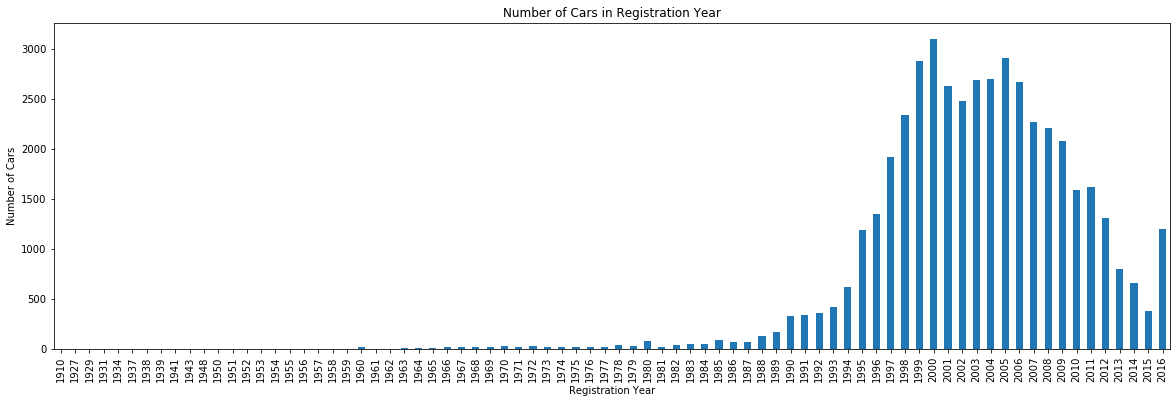

In [150]:
df_reg_year = df_cars['registration_year'].value_counts().sort_index()
df_reg_year.plot(kind='bar', figsize=(20,6))
plt.xlabel('Registration Year')
plt.ylabel('Number of Cars')
plt.title('Number of Cars in Registration Year')

We found most of the cars in this dataset were from 1995 to 2012.

## Analyzing the data - Car Brand

In [171]:
car_brand = df_cars['brand'].value_counts()
print(car_brand)

volkswagen        9799
bmw               5107
opel              4971
mercedes_benz     4480
audi              4022
ford              3237
renault           2182
peugeot           1384
fiat              1187
seat               846
skoda              761
nissan             711
mazda              706
smart              658
citroen            651
toyota             593
hyundai            464
sonstige_autos     442
volvo              423
mini               408
mitsubishi         379
honda              365
kia                328
alfa_romeo         309
porsche            279
suzuki             275
chevrolet          263
chrysler           163
dacia              123
daihatsu           116
jeep               106
subaru              98
land_rover          98
saab                77
jaguar              71
daewoo              69
trabant             63
rover               62
lancia              49
lada                27
Name: brand, dtype: int64


In [165]:
car_brand_dict_mean_price = {}
car_brand_unique = df_cars['brand'].unique()
for brand in car_brand_unique:
    df_car_brand = df_cars[df_cars['brand'] == brand]
    mean_price = df_car_brand['price'].mean().round(2)
    
    car_brand_dict_mean_price[brand] = mean_price
print(car_brand_dict_mean_price)

{'peugeot': 3113.86, 'bmw': 8381.68, 'volkswagen': 5436.95, 'smart': 3596.4, 'ford': 3779.27, 'chrysler': 3486.58, 'seat': 4433.42, 'renault': 2496.07, 'mercedes_benz': 8672.65, 'audi': 9380.72, 'sonstige_autos': 12784.56, 'opel': 3005.5, 'mazda': 4129.77, 'porsche': 46788.44, 'mini': 10639.45, 'toyota': 5167.09, 'dacia': 5915.53, 'nissan': 4756.66, 'jeep': 11650.5, 'saab': 3211.65, 'volvo': 4993.21, 'mitsubishi': 3439.1, 'jaguar': 11961.56, 'fiat': 2836.87, 'skoda': 6409.61, 'subaru': 4033.76, 'kia': 6018.44, 'citroen': 3796.26, 'chevrolet': 6759.89, 'hyundai': 5411.08, 'honda': 4119.11, 'daewoo': 1064.06, 'suzuki': 4126.34, 'trabant': 1846.52, 'land_rover': 19108.09, 'alfa_romeo': 4100.92, 'lada': 2688.3, 'rover': 1602.29, 'daihatsu': 1649.66, 'lancia': 3444.88}


In [166]:
car_brand_dict_mileage = {}
car_brand_unique = df_cars['brand'].unique()
for brand in car_brand_unique:
    df_car_brand = df_cars[df_cars['brand'] == brand]
    ave_mileage = df_car_brand['odometer_km'].mean().round(0)
    
    car_brand_dict_mileage[brand] = ave_mileage
print(car_brand_dict_mileage)

{'peugeot': 127128.0, 'bmw': 132695.0, 'volkswagen': 128800.0, 'smart': 99734.0, 'ford': 124277.0, 'chrysler': 133160.0, 'seat': 121537.0, 'renault': 128281.0, 'mercedes_benz': 131026.0, 'audi': 129245.0, 'sonstige_autos': 90396.0, 'opel': 129384.0, 'mazda': 124554.0, 'porsche': 98477.0, 'mini': 88309.0, 'toyota': 115944.0, 'dacia': 84268.0, 'nissan': 118326.0, 'jeep': 127123.0, 'saab': 144416.0, 'volvo': 138582.0, 'mitsubishi': 127098.0, 'jaguar': 125423.0, 'fiat': 116950.0, 'skoda': 110907.0, 'subaru': 125612.0, 'kia': 112302.0, 'citroen': 119555.0, 'chevrolet': 100266.0, 'hyundai': 106886.0, 'honda': 122493.0, 'daewoo': 121232.0, 'suzuki': 108164.0, 'trabant': 56111.0, 'land_rover': 118010.0, 'alfa_romeo': 131748.0, 'lada': 83519.0, 'rover': 137661.0, 'daihatsu': 116121.0, 'lancia': 122347.0}


### Using Top 20 Brands

In [176]:
df_top_20_Brands = df_cars['brand'].value_counts().head(20).rename_axis('brand').reset_index(name='counts')
df_top_20_Brands

,brand,counts
0,volkswagen,9799
1,bmw,5107
2,opel,4971
3,mercedes_benz,4480
4,audi,4022
5,ford,3237
6,renault,2182
7,peugeot,1384
8,fiat,1187
9,seat,846


In [178]:
dict_top_20_mean_price = {}
for index, row in df_top_20_Brands.iterrows():
    brand_name = row['brand']
    df_car_brand = df_cars[df_cars['brand'] == brand_name]
    mean_price = df_car_brand['price'].mean().round(2)
    
    dict_top_20_mean_price[brand_name] = mean_price
    
dict_top_20_mean_price

{'volkswagen': 5436.95,
 'bmw': 8381.68,
 'opel': 3005.5,
 'mercedes_benz': 8672.65,
 'audi': 9380.72,
 'ford': 3779.27,
 'renault': 2496.07,
 'peugeot': 3113.86,
 'fiat': 2836.87,
 'seat': 4433.42,
 'skoda': 6409.61,
 'nissan': 4756.66,
 'mazda': 4129.77,
 'smart': 3596.4,
 'citroen': 3796.26,
 'toyota': 5167.09,
 'hyundai': 5411.08,
 'sonstige_autos': 12784.56,
 'volvo': 4993.21,
 'mini': 10639.45}